# AI4I 2020 Predictive Maintenance - Data Exploration

## Overview
This notebook provides an initial exploration of the AI4I 2020 Predictive Maintenance Dataset.

**Objectives:**
- Understand the dataset structure and features
- Identify data quality issues (missing values, outliers)
- Explore feature distributions and relationships
- Analyze target variable patterns
- Generate initial insights for feature engineering

**Dataset Information:**
- Source: AI4I 2020 Predictive Maintenance Dataset
- Domain: Industrial IoT and Predictive Maintenance
- Type: Multivariate data with failure indicators

## 1. Import Libraries and Setup

In [1]:
# Core Data Science Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Data Loading and Initial Inspection

In [24]:
# Load the dataset
data_path = '../data/raw/ai4i2020.csv'
df = pd.read_csv(data_path)

# Fix column name if necessary
if 'UDI' in df.columns:
    df = df.rename(columns={'UDI': 'UID'})

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!
Dataset shape: (10000, 14)
Number of rows: 10,000
Number of columns: 14


In [25]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,UID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [26]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UID                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes:

TWF - Tool Wear Failure
HDF - Heat Dissipation Failure
PWF - Power Failure
OSF - Overstrain Failure
RNF - Random Failures


## 3. Basic Statistical Summary

In [27]:
# Categorize features early for consistent analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")
print(f"Total columns: {len(df.columns)}")

Numerical columns: ['UID', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Categorical columns: ['Product ID', 'Type']
Total columns: 14


In [28]:
# Statistical summary for numerical columns
print("Statistical Summary - Numerical Features:")
df.describe()

Statistical Summary - Numerical Features:


,UID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [29]:
# Statistical summary for categorical columns
if len(categorical_cols) > 0:
    print("Statistical Summary - Categorical Features:")
    print(df[categorical_cols].describe())
    print("\nDetailed categorical analysis:")
    for col in categorical_cols:
        print(f"\n🔹 {col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Value counts:\n{df[col].value_counts()}")
else:
    print("No categorical columns found.")

Statistical Summary - Categorical Features:
       Product ID   Type
count       10000  10000
unique      10000      3
top        L57163      L
freq            1   6000

Detailed categorical analysis:

🔹 Product ID:
  Unique values: 10000
  Value counts:
Product ID
L57163    1
M24842    1
L57161    1
L57160    1
L57159    1
         ..
L47184    1
L47183    1
L47182    1
L47181    1
M14860    1
Name: count, Length: 10000, dtype: int64

🔹 Type:
  Unique values: 3
  Value counts:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


## 4. Target Variable Analysis

In [31]:
# Analyze the main target variable: Machine failure
target_col = 'Machine failure'

print(f"Target Variable Analysis: {target_col}")
print("=" * 40)

# Display value counts
print(f"\n{target_col} - Value counts:")
print(df[target_col].value_counts())

print(f"\n{target_col} - Percentage distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

Target Variable Analysis: Machine failure

Machine failure - Value counts:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Machine failure - Percentage distribution:
Machine failure
0    96.61
1     3.39
Name: proportion, dtype: float64


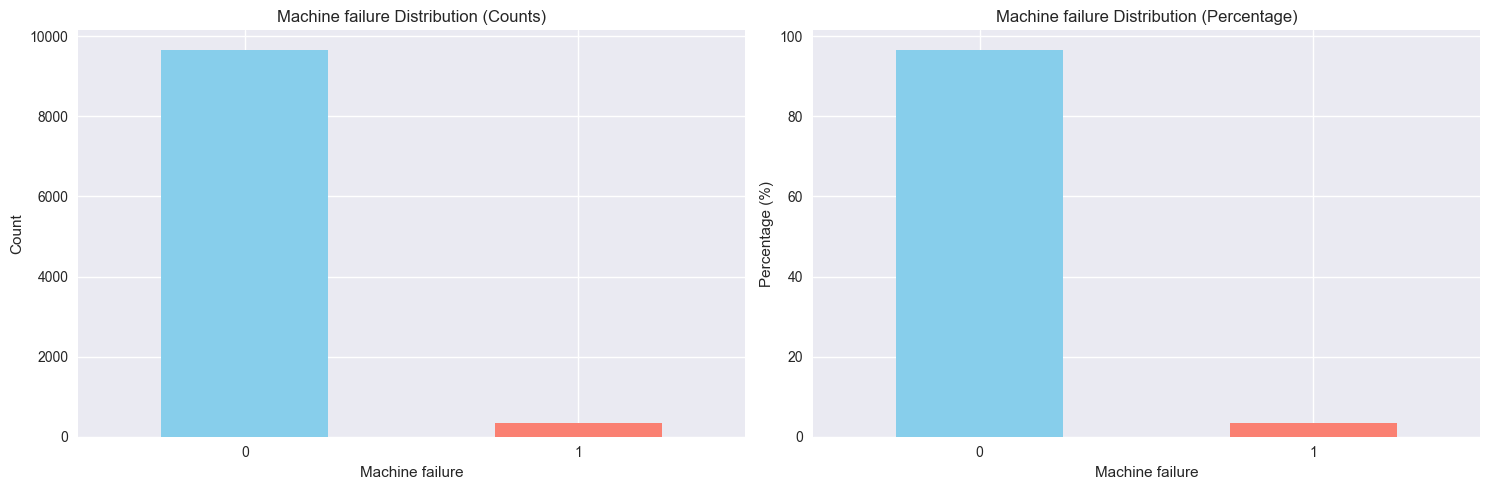


📊 Class Imbalance Analysis:
Imbalance ratio (minority/majority): 0.0351
⚠️  Severe class imbalance detected - consider resampling techniques


In [32]:
# Visualize target variable distribution (assuming the main target is 'Machine failure')
target_col = 'Machine failure' if 'Machine failure' in df.columns else potential_targets[0] if potential_targets else None

if target_col:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Count plot
    df[target_col].value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
    ax1.set_title(f'{target_col} Distribution (Counts)')
    ax1.set_ylabel('Count')
    ax1.set_xlabel(target_col)
    ax1.tick_params(axis='x', rotation=0)
    
    # Percentage plot
    (df[target_col].value_counts(normalize=True) * 100).plot(kind='bar', ax=ax2, color=['skyblue', 'salmon'])
    ax2.set_title(f'{target_col} Distribution (Percentage)')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_xlabel(target_col)
    ax2.tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Class imbalance analysis
    imbalance_ratio = df[target_col].value_counts().min() / df[target_col].value_counts().max()
    print(f"\n📊 Class Imbalance Analysis:")
    print(f"Imbalance ratio (minority/majority): {imbalance_ratio:.4f}")
    if imbalance_ratio < 0.1:
        print("⚠️  Severe class imbalance detected - consider resampling techniques")
    elif imbalance_ratio < 0.3:
        print("⚠️  Moderate class imbalance detected")
    else:
        print("✅ Relatively balanced classes")
else:
    print("No clear target variable identified. Please specify the target column.")

In [33]:
# Add this as a new cell after Section 4 (Target Variable Analysis)

## 4.1 Machine Failure vs Individual Failure Modes Relationship

# Check if Machine failure is the logical OR of individual failure modes
failure_modes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df['calculated_machine_failure'] = df[failure_modes].any(axis=1).astype(int)

print("🔍 MACHINE FAILURE vs FAILURE MODES ANALYSIS:")
print("=" * 60)

# Compare original Machine failure with calculated version
comparison = pd.crosstab(df['Machine failure'], df['calculated_machine_failure'], 
                        margins=True, margins_name='Total')
print("\nCrosstab: Machine failure vs Calculated (from failure modes):")
print(comparison)

# Check if they match exactly
matches = (df['Machine failure'] == df['calculated_machine_failure']).all()
print(f"\n✅ Perfect match: {matches}")

if not matches:
    # Find discrepancies
    discrepancies = df[df['Machine failure'] != df['calculated_machine_failure']]
    print(f"\n⚠️  Discrepancies found: {len(discrepancies)} rows")
    print("\nFirst few discrepant rows:")
    print(discrepancies[['Machine failure', 'calculated_machine_failure'] + failure_modes].head())

# Analyze failure mode combinations
print("\n📊 FAILURE MODE COMBINATIONS:")
df['failure_combination'] = df[failure_modes].apply(
    lambda x: '+'.join([col for col, val in x.items() if val == 1]) if x.any() else 'No Failure', 
    axis=1
)

failure_combo_counts = df['failure_combination'].value_counts()
print(f"\nMost common failure combinations:")
print(failure_combo_counts.head(10))

# Failure mode statistics
print(f"\n📈 INDIVIDUAL FAILURE MODE STATISTICS:")
for mode in failure_modes:
    count = df[mode].sum()
    percentage = (count / len(df)) * 100
    print(f"{mode:>3}: {count:>4} failures ({percentage:>5.2f}%)")

total_individual_failures = df[failure_modes].sum().sum()
machine_failures = df['Machine failure'].sum()
print(f"\nTotal individual failure events: {total_individual_failures}")
print(f"Total machine failures: {machine_failures}")
print(f"Average failure modes per machine failure: {total_individual_failures/machine_failures:.2f}")

🔍 MACHINE FAILURE vs FAILURE MODES ANALYSIS:

Crosstab: Machine failure vs Calculated (from failure modes):
calculated_machine_failure     0    1  Total
Machine failure                             
0                           9643   18   9661
1                              9  330    339
Total                       9652  348  10000

✅ Perfect match: False

⚠️  Discrepancies found: 27 rows

First few discrepant rows:
      Machine failure  calculated_machine_failure  TWF  HDF  PWF  OSF  RNF
1221                0                           1    0    0    0    0    1
1302                0                           1    0    0    0    0    1
1437                1                           0    0    0    0    0    0
1748                0                           1    0    0    0    0    1
2072                0                           1    0    0    0    0    1

📊 FAILURE MODE COMBINATIONS:

Most common failure combinations:
failure_combination
No Failure    9652
HDF            106
PWF     

## 4.2 Feature Engineering Based on Domain Knowledge

In [17]:
# Feature Engineering based on exploration insights and domain knowledge
print("🔧 FEATURE ENGINEERING - Creating new features based on insights:")
print("=" * 65)

# 1. Temperature-based features (based on high correlation ~0.87)
df['temp_difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['temp_ratio'] = df['Process temperature [K]'] / df['Air temperature [K]']
df['avg_temperature'] = (df['Process temperature [K]'] + df['Air temperature [K]']) / 2

print("✅ Temperature features created:")
print(f"  • temp_difference: {df['temp_difference'].describe()[['mean', 'std']].to_dict()}")
print(f"  • temp_ratio: {df['temp_ratio'].describe()[['mean', 'std']].to_dict()}")

# 2. Power/Energy estimation (based on Speed-Torque correlation ~-0.85)
df['power_estimate'] = df['Torque [Nm]'] * df['Rotational speed [rpm]'] / 9549  # Convert to kW
df['specific_power'] = df['power_estimate'] / (df['Tool wear [min]'] + 1)  # Power per wear unit
df['energy_intensity'] = df['power_estimate'] / df['Rotational speed [rpm]']  # Energy per revolution

print("✅ Power/Energy features created:")
print(f"  • power_estimate (kW): {df['power_estimate'].describe()[['mean', 'std']].to_dict()}")
print(f"  • specific_power: {df['specific_power'].describe()[['mean', 'std']].to_dict()}")

# 3. Failure mode aggregations (based on failure mode analysis)
df['total_failure_modes'] = df[failure_modes].sum(axis=1)
df['mechanical_failure_risk'] = df['TWF'] + df['OSF']  # Tool Wear + Overstrain
df['thermal_failure_risk'] = df['HDF']  # Heat Dissipation
df['electrical_failure_risk'] = df['PWF']  # Power Failure
df['random_failure_risk'] = df['RNF']  # Random Failures

print("✅ Failure aggregation features created:")
for risk_type in ['mechanical_failure_risk', 'thermal_failure_risk', 'electrical_failure_risk']:
    risk_count = df[risk_type].sum()
    print(f"  • {risk_type}: {risk_count} cases")

# 4. Operational efficiency indicators
df['wear_rate'] = df['Tool wear [min]'] / (df['Rotational speed [rpm]'] + 1)  # Wear per revolution
df['thermal_efficiency'] = df['temp_difference'] / df['power_estimate']  # Temperature rise per power
df['load_factor'] = df['Torque [Nm]'] / df['Rotational speed [rpm]']  # Load intensity

print("✅ Efficiency features created:")
print(f"  • wear_rate: {df['wear_rate'].describe()[['mean', 'std']].to_dict()}")

# 5. Prevented failure indicator (critical business insight!)
df['prevented_failure'] = ((df[failure_modes].sum(axis=1) > 0) & (df['Machine failure'] == 0)).astype(int)
prevented_count = df['prevented_failure'].sum()
prevention_rate = (prevented_count / df[failure_modes].sum().sum()) * 100

print("✅ Business intelligence feature created:")
print(f"  • prevented_failure: {prevented_count} cases ({prevention_rate:.1f}% of component failures)")

# 6. Product quality indicators (based on categorical features)
if 'Type' in df.columns:
    # Create dummy variables for product type
    type_dummies = pd.get_dummies(df['Type'], prefix='type')
    df = pd.concat([df, type_dummies], axis=1)
    print(f"✅ Product type encoding: {list(type_dummies.columns)}")

# Summary of new features
new_features = ['temp_difference', 'temp_ratio', 'avg_temperature', 
                'power_estimate', 'specific_power', 'energy_intensity',
                'total_failure_modes', 'mechanical_failure_risk', 'thermal_failure_risk',
                'electrical_failure_risk', 'random_failure_risk',
                'wear_rate', 'thermal_efficiency', 'load_factor', 'prevented_failure']

print(f"\n📊 SUMMARY: Created {len(new_features)} new engineered features")
print(f"Original features: {df.shape[1] - len(new_features)}")
print(f"Total features now: {df.shape[1]}")

# Update feature lists for further analysis
numerical_cols_updated = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove target variables from analysis features
analysis_features = [col for col in numerical_cols_updated 
                    if col not in ['Machine failure', 'calculated_machine_failure'] + failure_modes]

print(f"\n🎯 Features ready for modeling: {len(analysis_features)} numerical features")

🔧 FEATURE ENGINEERING - Creating new features based on insights:
✅ Temperature features created:
  • temp_difference: {'mean': 10.00063, 'std': 1.0010938127779023}
  • temp_ratio: {'mean': 1.0333519084658047, 'std': 0.003492227477421063}
✅ Power/Energy features created:
  • power_estimate (kW): {'mean': 6.279939997905539, 'std': 1.0674514484117752}
  • specific_power: {'mean': 0.20803454724374382, 'std': 0.7312958917296228}
✅ Failure aggregation features created:
  • mechanical_failure_risk: 144 cases
  • thermal_failure_risk: 115 cases
  • electrical_failure_risk: 95 cases
✅ Efficiency features created:
  • wear_rate: {'mean': 0.07091792436527275, 'std': 0.042589746627943126}
✅ Business intelligence feature created:
  • prevented_failure: 18 cases (4.8% of component failures)
✅ Product type encoding: ['type_H', 'type_L', 'type_M']

📊 SUMMARY: Created 15 new engineered features
Original features: 19
Total features now: 34

🎯 Features ready for modeling: 21 numerical features


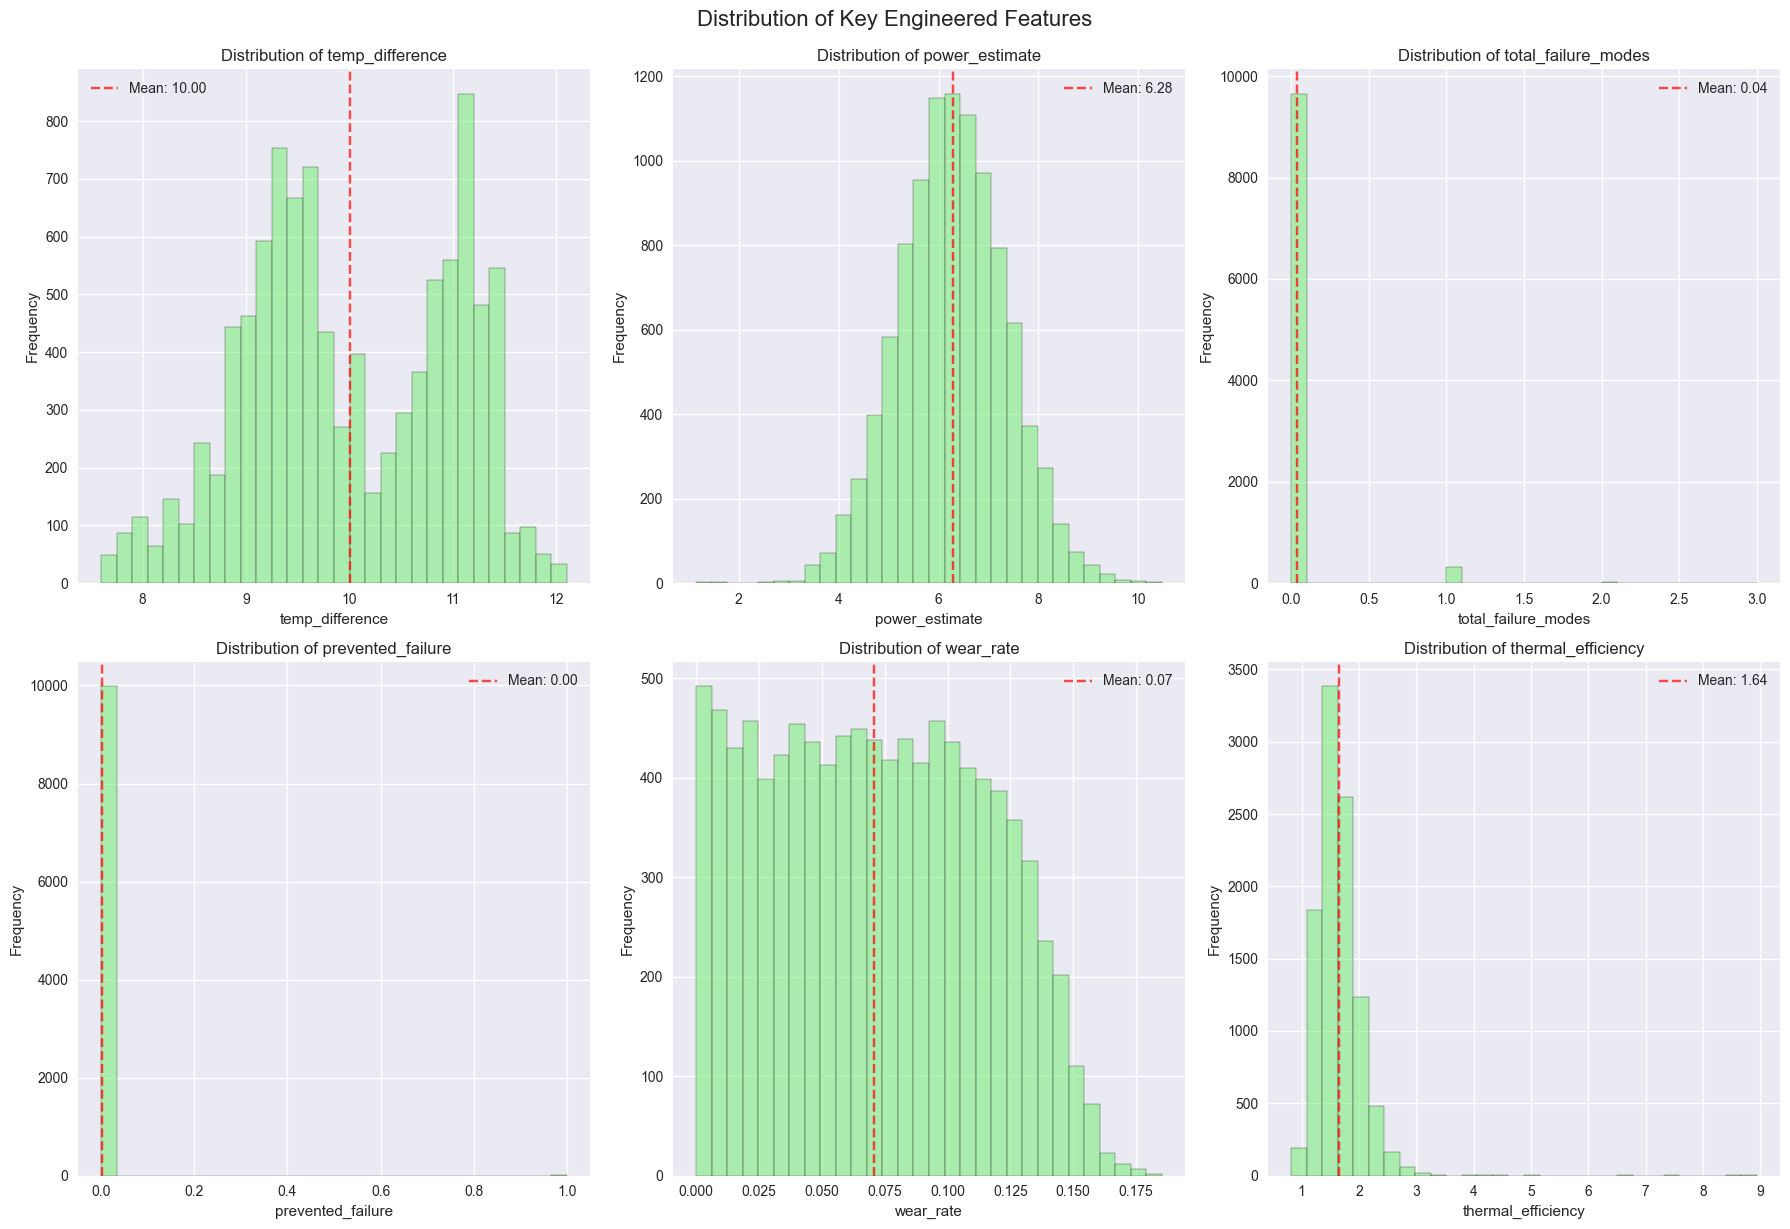


🎯 CORRELATION OF ENGINEERED FEATURES WITH MACHINE FAILURE:
temp_difference           | Correlation:  -0.1117
power_estimate            | Correlation:   0.1760
total_failure_modes       | Correlation:   0.9330
mechanical_failure_risk   | Correlation:   0.6320
prevented_failure         | Correlation:  -0.0080
wear_rate                 | Correlation:   0.1302

🏆 Most predictive engineered features:
  1. total_failure_modes: 0.9330
  2. mechanical_failure_risk: 0.6320
  3. power_estimate: 0.1760

💡 Engineering Success: Created features with correlation range: -0.1117 to 0.9330


In [18]:
# Visualize key engineered features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Key engineered features to visualize
key_features = ['temp_difference', 'power_estimate', 'total_failure_modes', 
                'prevented_failure', 'wear_rate', 'thermal_efficiency']

for i, feature in enumerate(key_features):
    if i < len(axes):
        # Distribution plot
        df[feature].hist(bins=30, ax=axes[i], alpha=0.7, color='lightgreen', edgecolor='black')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        
        # Add statistics
        mean_val = df[feature].mean()
        std_val = df[feature].std()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Distribution of Key Engineered Features', fontsize=16, y=1.02)
plt.show()

# Correlation of new features with target
print("\n🎯 CORRELATION OF ENGINEERED FEATURES WITH MACHINE FAILURE:")
print("=" * 60)

engineered_features = ['temp_difference', 'power_estimate', 'total_failure_modes', 
                      'mechanical_failure_risk', 'prevented_failure', 'wear_rate']

target_correlations = []
for feature in engineered_features:
    corr = df[feature].corr(df['Machine failure'])
    target_correlations.append((feature, corr))
    print(f"{feature:<25} | Correlation: {corr:>8.4f}")

# Sort by absolute correlation
target_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\n🏆 Most predictive engineered features:")
for i, (feature, corr) in enumerate(target_correlations[:3], 1):
    print(f"  {i}. {feature}: {corr:.4f}")

print(f"\n💡 Engineering Success: Created features with correlation range: {min(corr for _, corr in target_correlations):.4f} to {max(corr for _, corr in target_correlations):.4f}")

## 5. Feature Analysis and Distributions

In [19]:
# Remove target variable from feature lists if it exists
# (categorical_cols and numerical_cols are already defined above)

# Create copies to avoid modifying the original lists
numerical_features = numerical_cols.copy()
categorical_features = categorical_cols.copy()

# Remove target from feature lists if present
if 'target_col' in locals() and target_col:
    if target_col in numerical_features:
        numerical_features.remove(target_col)
    if target_col in categorical_features:
        categorical_features.remove(target_col)

print(f"Numerical features for analysis ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features for analysis ({len(categorical_features)}): {categorical_features}")

# Update the variables for the rest of the analysis
numerical_cols = numerical_features
categorical_cols = categorical_features

Numerical features for analysis (11): ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Categorical features for analysis (2): ['Product ID', 'Type']


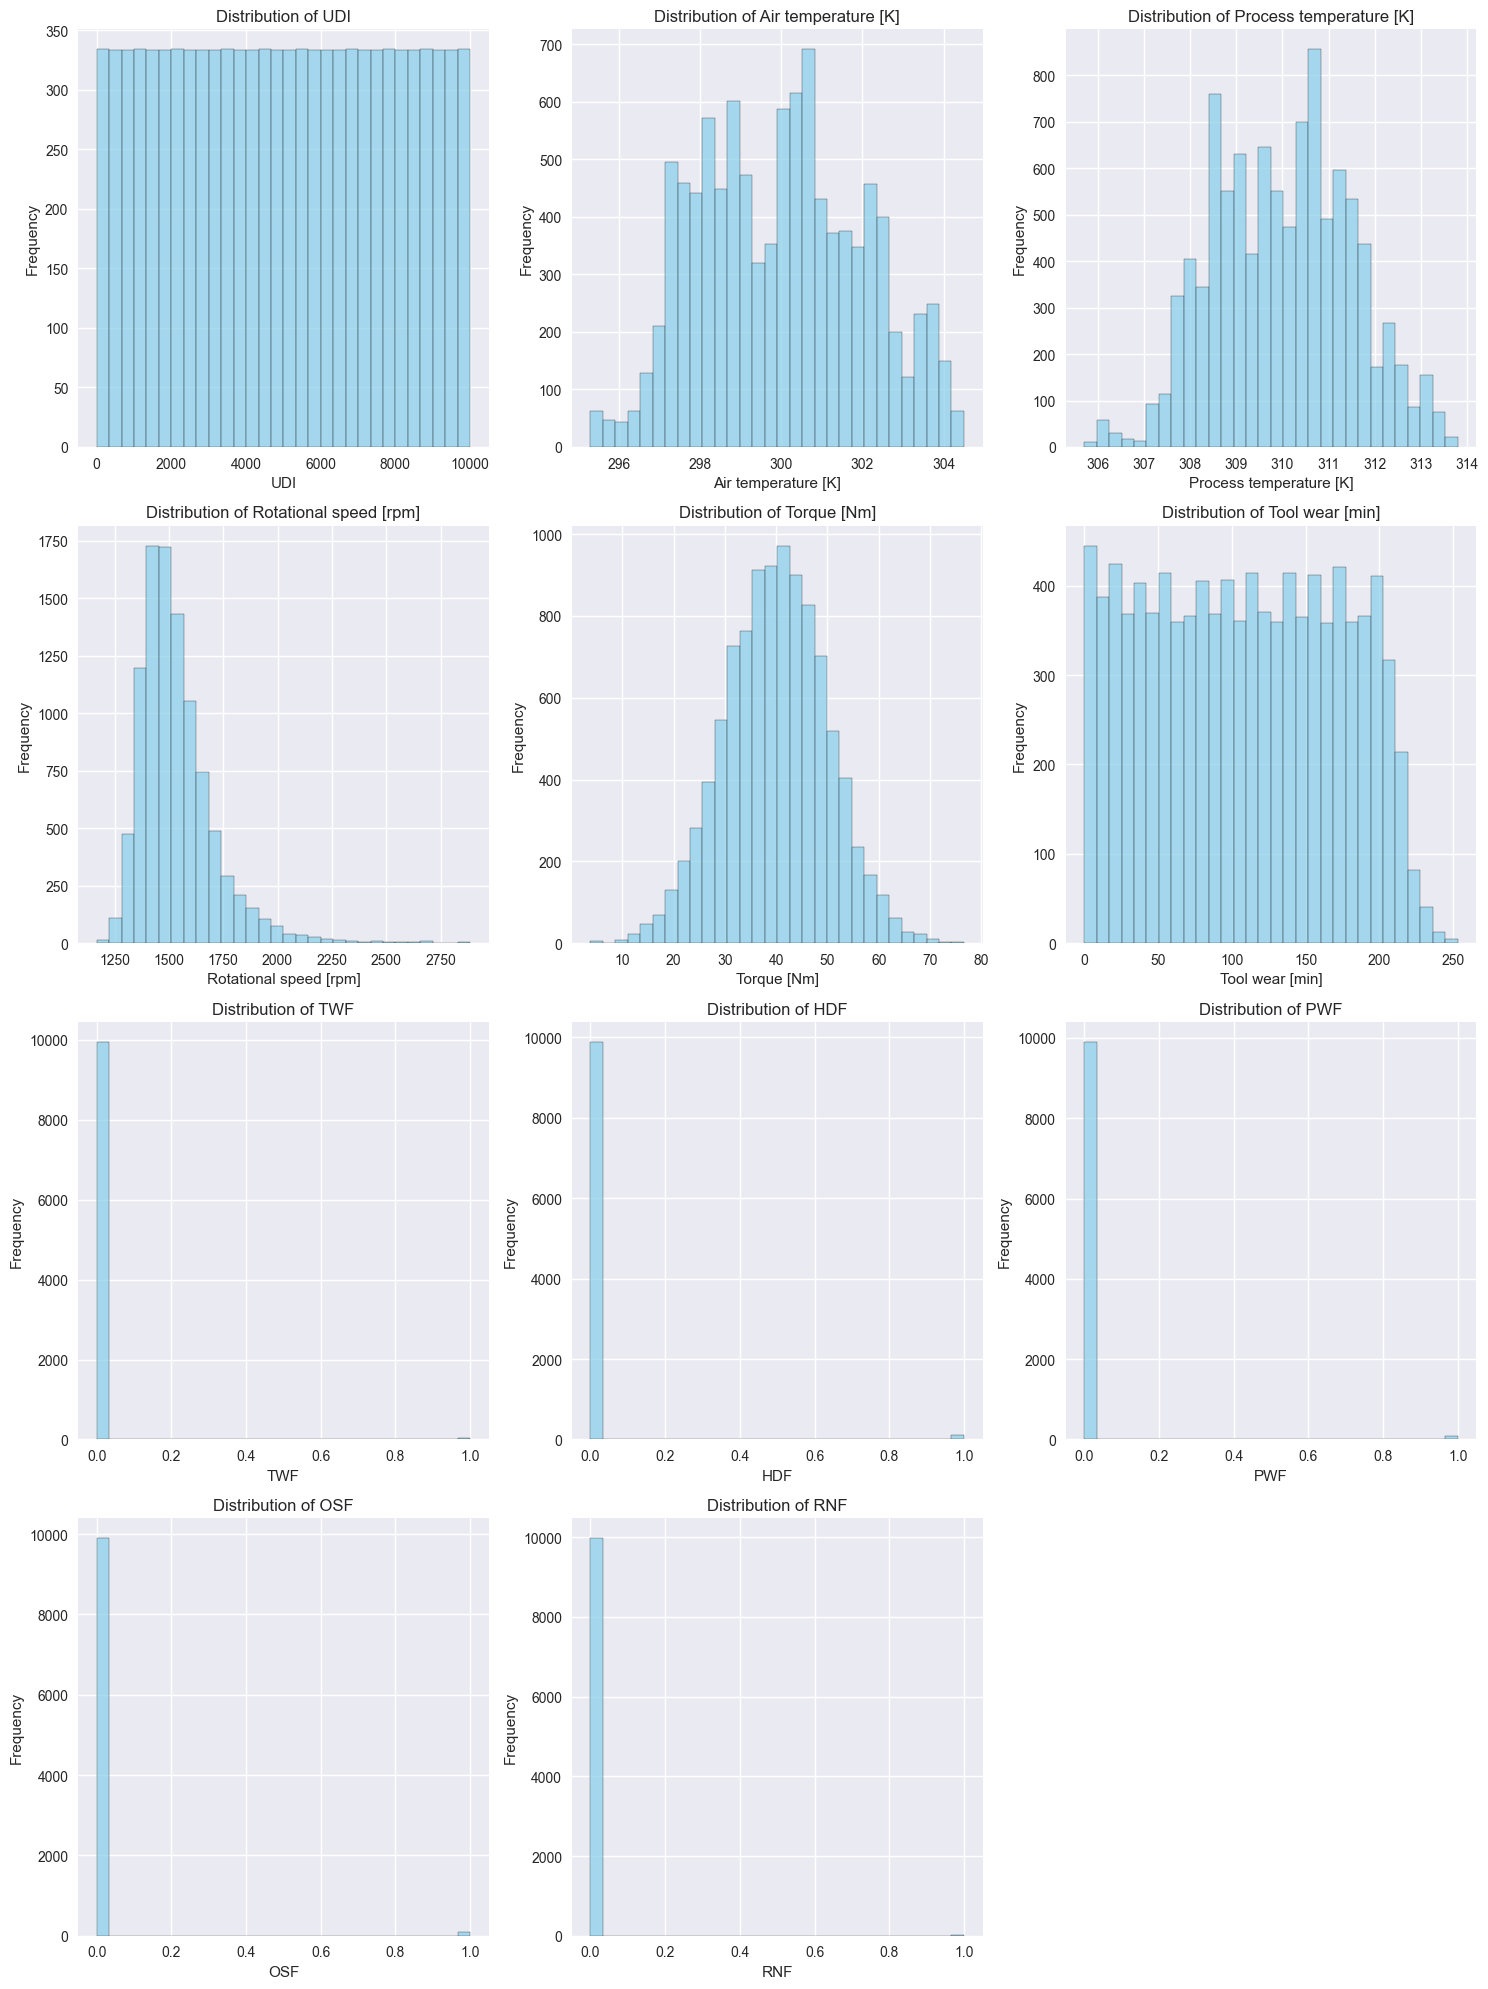

In [20]:
# Distribution plots for numerical features
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found for distribution analysis.")

## 6. Correlation Analysis

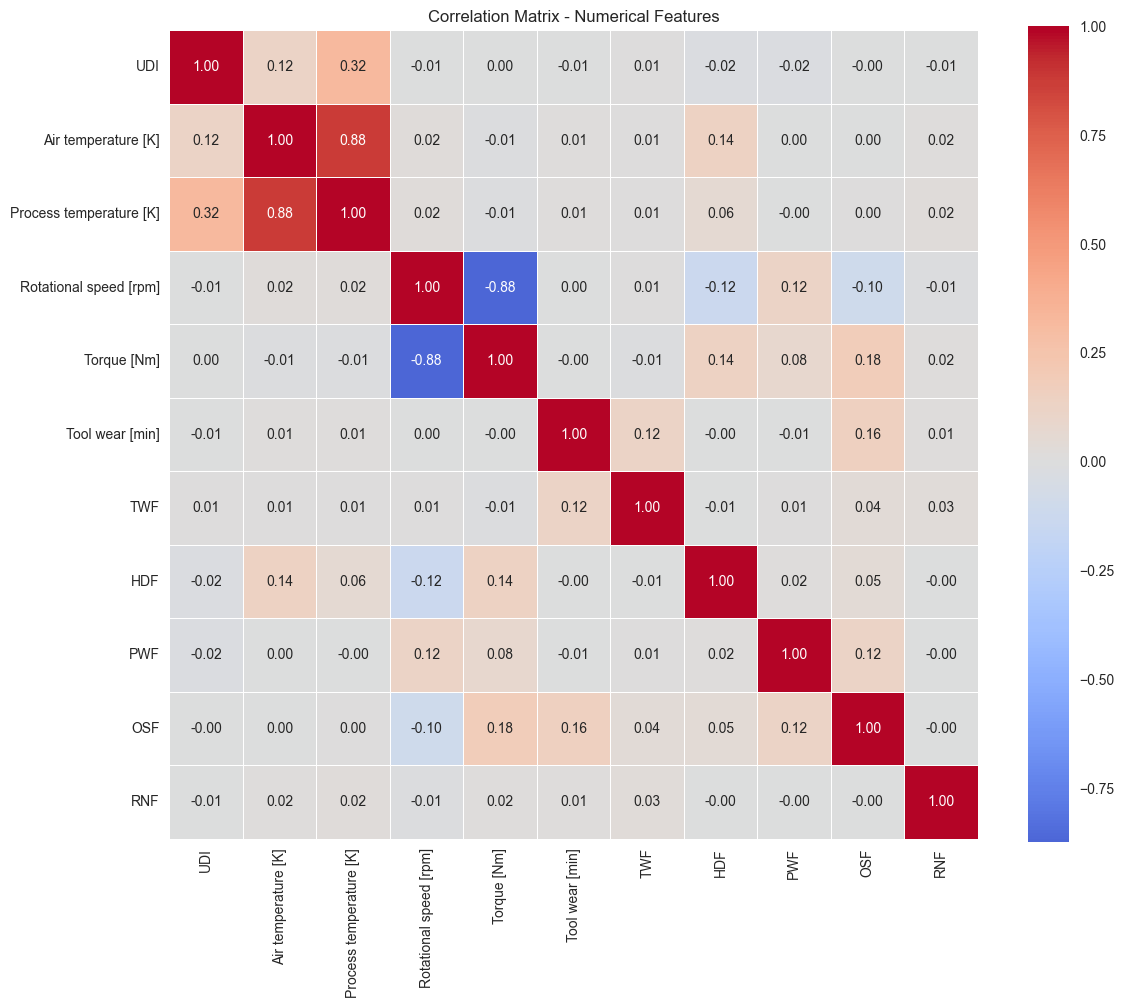


🔍 Highly Correlated Feature Pairs (|correlation| > 0.7):
  Air temperature [K] ↔ Process temperature [K]: 0.876
  Rotational speed [rpm] ↔ Torque [Nm]: -0.875


In [21]:
# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, fmt='.2f')
    plt.title('Correlation Matrix - Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # Identify highly correlated features
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = abs(correlation_matrix.iloc[i, j])
            if corr_val > 0.7:  # High correlation threshold
                high_corr_pairs.append((
                    correlation_matrix.columns[i], 
                    correlation_matrix.columns[j], 
                    correlation_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print("\n🔍 Highly Correlated Feature Pairs (|correlation| > 0.7):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
    else:
        print("\n✅ No highly correlated feature pairs found.")
else:
    print("Insufficient numerical features for correlation analysis.")

## 7. Feature-Target Relationships

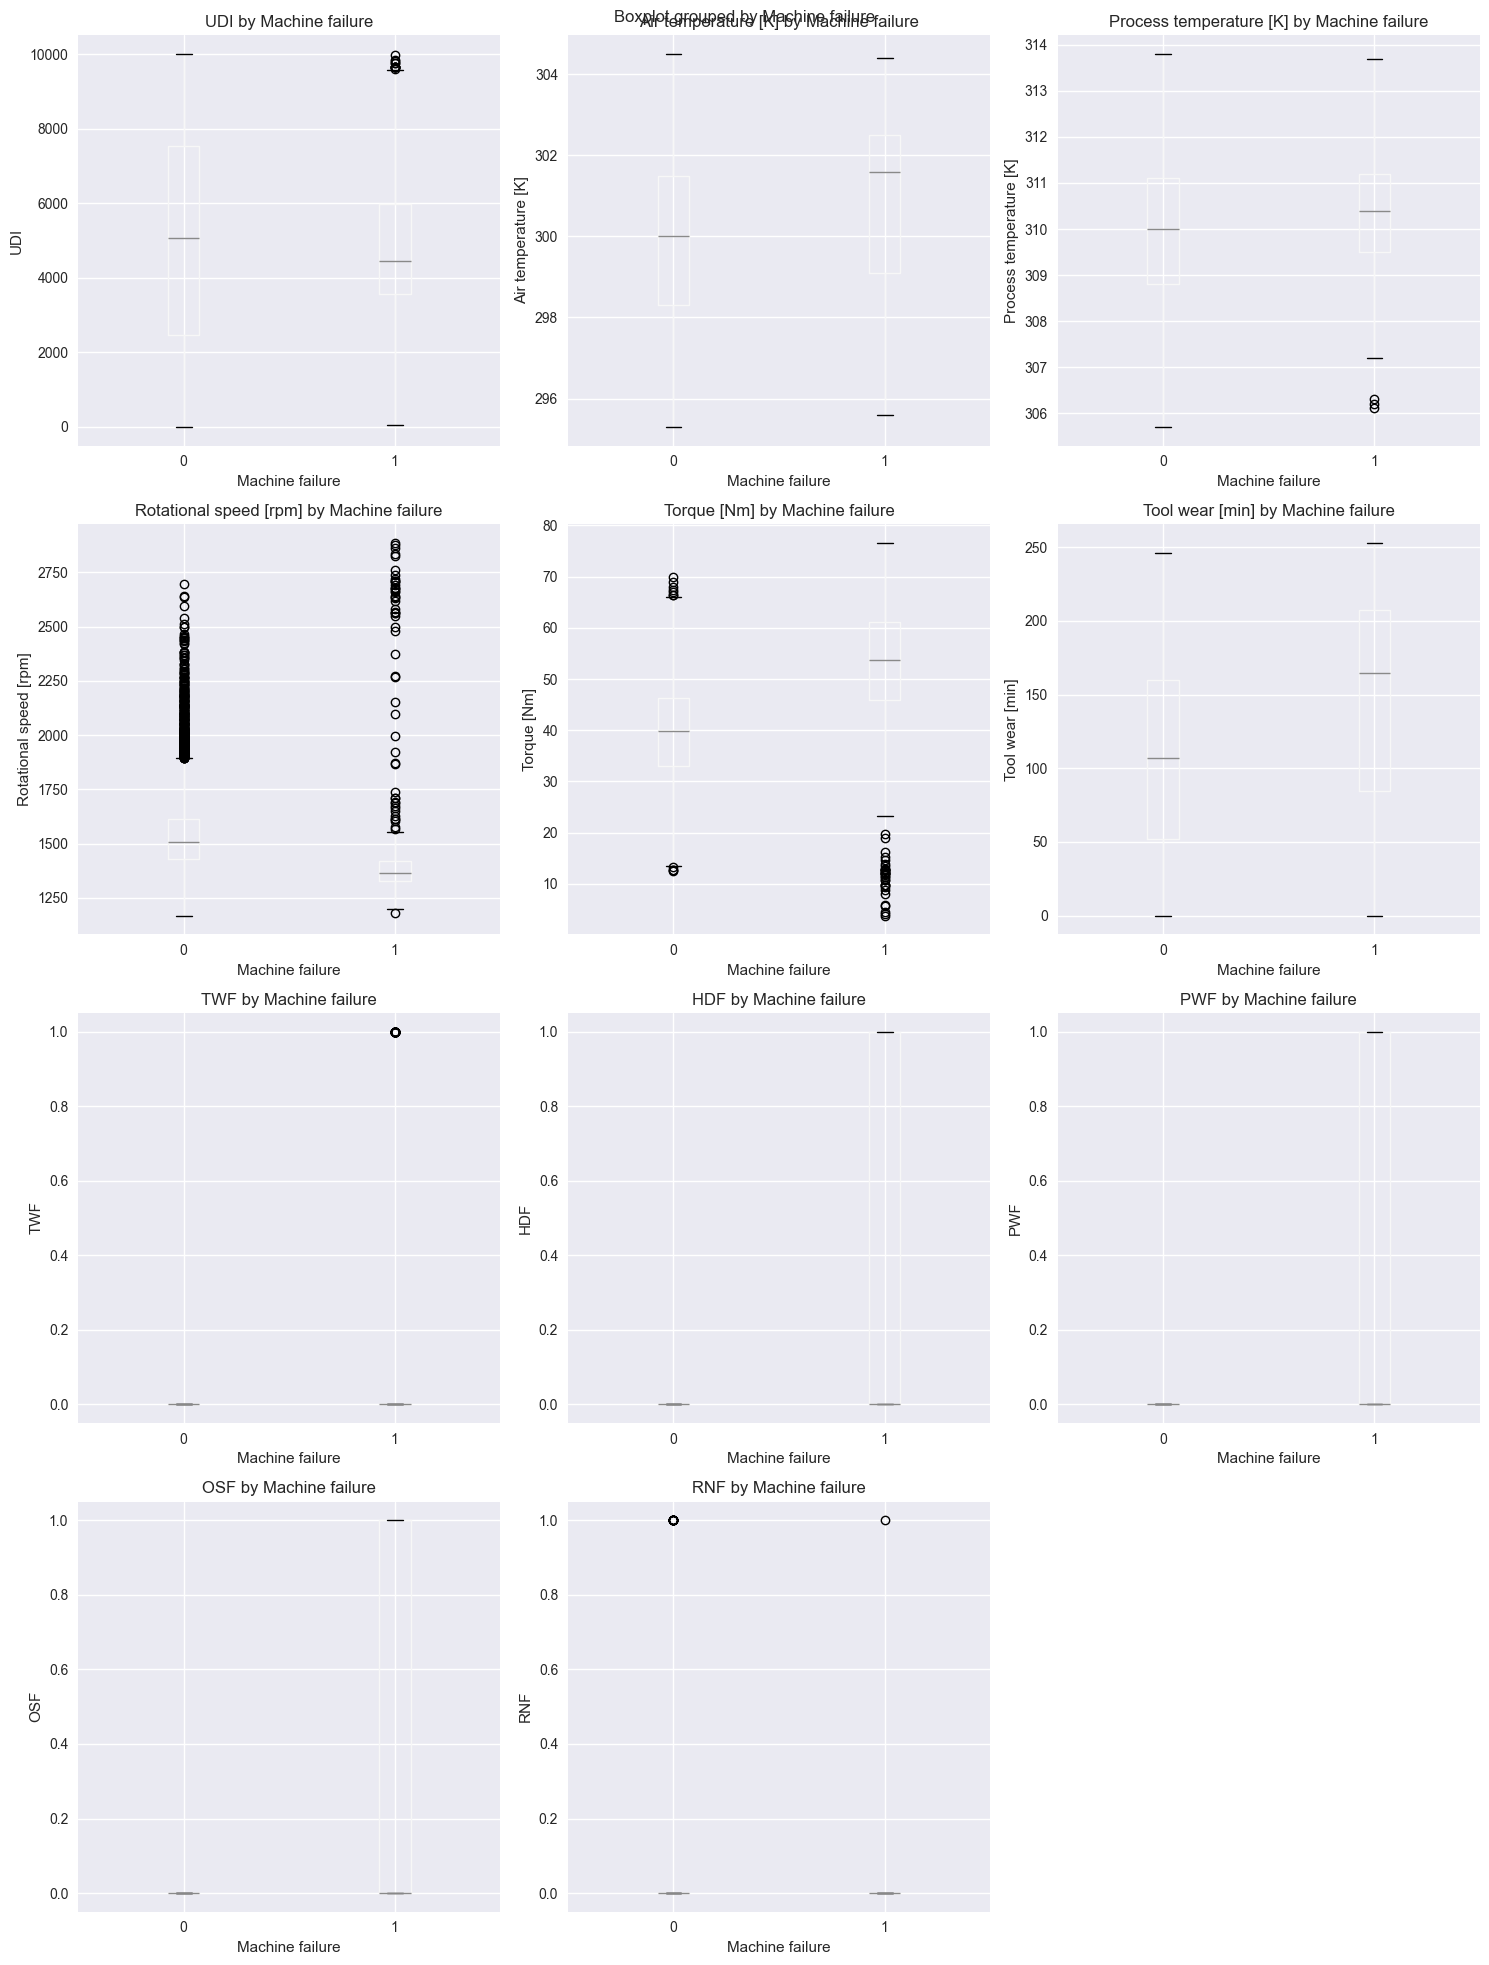

In [22]:
# Analyze relationship between numerical features and target variable
if target_col and len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Box plot showing feature distribution by target class
            df.boxplot(column=col, by=target_col, ax=axes[i])
            axes[i].set_title(f'{col} by {target_col}')
            axes[i].set_xlabel(target_col)
            axes[i].set_ylabel(col)
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [23]:
# Statistical significance testing for numerical features vs target
if target_col and len(numerical_cols) > 0:
    print("📊 Statistical Significance Testing (Numerical Features vs Target):")
    print("=" * 70)
    
    significant_features = []
    
    for col in numerical_cols:
        # Separate feature values by target class
        groups = [group[col].values for name, group in df.groupby(target_col)]
        
        # Perform t-test (assuming 2 classes) or ANOVA (for more classes)
        if len(groups) == 2:
            stat, p_value = stats.ttest_ind(groups[0], groups[1])
            test_name = "T-test"
        else:
            stat, p_value = stats.f_oneway(*groups)
            test_name = "ANOVA"
        
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        
        print(f"{col:<25} | {test_name:<10} | p-value: {p_value:.6f} {significance}")
        
        if p_value < 0.05:
            significant_features.append(col)
    
    print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")
    print(f"\n🎯 Statistically significant features: {significant_features}")

📊 Statistical Significance Testing (Numerical Features vs Target):
UDI                       | T-test     | p-value: 0.022068 *
Air temperature [K]       | T-test     | p-value: 0.000000 ***
Process temperature [K]   | T-test     | p-value: 0.000324 ***
Rotational speed [rpm]    | T-test     | p-value: 0.000010 ***
Torque [Nm]               | T-test     | p-value: 0.000000 ***
Tool wear [min]           | T-test     | p-value: 0.000000 ***
TWF                       | T-test     | p-value: 0.000000 ***
HDF                       | T-test     | p-value: 0.000000 ***
PWF                       | T-test     | p-value: 0.000000 ***
OSF                       | T-test     | p-value: 0.000000 ***
RNF                       | T-test     | p-value: 0.651597 

Significance levels: *** p<0.001, ** p<0.01, * p<0.05

🎯 Statistically significant features: ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF']


## 8. Outlier Detection

In [35]:
# Outlier detection using IQR method
if len(numerical_cols) > 0:
    print("🔍 Outlier Detection (IQR Method):")
    print("=" * 50)
    
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Feature': col,
            'Outlier Count': outlier_count,
            'Outlier %': outlier_percentage,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound
        })
        
        print(f"{col:<25} | Outliers: {outlier_count:>4} ({outlier_percentage:>5.2f}%)")
    
    # Create outlier summary DataFrame
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n📊 Outlier Summary:")
    display(outlier_df)
    
    # Analysis of outlier patterns
    high_outlier_features = outlier_df[outlier_df['Outlier %'] > 2.0]
    if len(high_outlier_features) > 0:
        print(f"\n⚠️  Features with high outlier rates (>2%):")
        for _, row in high_outlier_features.iterrows():
            print(f"  • {row['Feature']}: {row['Outlier %']:.2f}%")
    else:
        print("\n✅ No features with excessive outlier rates found.")
        
else:
    print("No numerical features found for outlier analysis.")

🔍 Outlier Detection (IQR Method):
UID                       | Outliers:    0 ( 0.00%)
Air temperature [K]       | Outliers:    0 ( 0.00%)
Process temperature [K]   | Outliers:    0 ( 0.00%)
Rotational speed [rpm]    | Outliers:  418 ( 4.18%)
Torque [Nm]               | Outliers:   69 ( 0.69%)
Tool wear [min]           | Outliers:    0 ( 0.00%)
Machine failure           | Outliers:  339 ( 3.39%)
TWF                       | Outliers:   46 ( 0.46%)
HDF                       | Outliers:  115 ( 1.15%)
PWF                       | Outliers:   95 ( 0.95%)
OSF                       | Outliers:   98 ( 0.98%)
RNF                       | Outliers:   19 ( 0.19%)

📊 Outlier Summary:


,Feature,Outlier Count,Outlier %,Lower Bound,Upper Bound
0,UID,0,0.00,-4998.50,14999.50
1,Air temperature [K],0,0.00,293.50,306.30
2,Process temperature [K],0,0.00,305.35,314.55
3,Rotational speed [rpm],418,4.18,1139.50,1895.50
4,Torque [Nm],69,0.69,12.80,67.20
5,Tool wear [min],0,0.00,-110.50,325.50
6,Machine failure,339,3.39,0.00,0.00
7,TWF,46,0.46,0.00,0.00
8,HDF,115,1.15,0.00,0.00
9,PWF,95,0.95,0.00,0.00



⚠️  Features with high outlier rates (>2%):
  • Rotational speed [rpm]: 4.18%
  • Machine failure: 3.39%


Die binären/kategorischen Features (Failure modes) sollten nicht mit IQR analysiert werden. Die "Outliers" bei Machine failure und den Failure modes sind keine echten Outliers, sondern normale Werte in binären Daten.

## 9. Categorical Feature Analysis

📊 Categorical Feature Analysis:

🔹 Product ID:
Unique products: 10000
Sample values: ['M14860', 'L47181', 'L47182', 'L47183', 'L47184', 'M14865', 'L47186', 'L47187', 'M14868', 'M14869']

🔹 Type (Product Quality) - Detailed Analysis:
Product types: ['L', 'M', 'H']

📊 Absolute Numbers by Product Type:
  • L: 6,000 products (60.0%)
  • M: 2,997 products (30.0%)
  • H: 1,003 products (10.0%)

🎯 Failure Analysis by Product Type:
Absolute counts (Non-Failure vs Failure):
Machine failure     0    1    All
Type                             
H                 982   21   1003
L                5765  235   6000
M                2914   83   2997
All              9661  339  10000

📈 Failure Rates by Product Type:

  🔸 Type L:
    • Total products: 6,000
    • Non-failures: 5,765
    • Failures: 235
    • Failure rate: 3.92%

  🔸 Type M:
    • Total products: 2,997
    • Non-failures: 2,914
    • Failures: 83
    • Failure rate: 2.77%

  🔸 Type H:
    • Total products: 1,003
    • Non-failures: 982
  

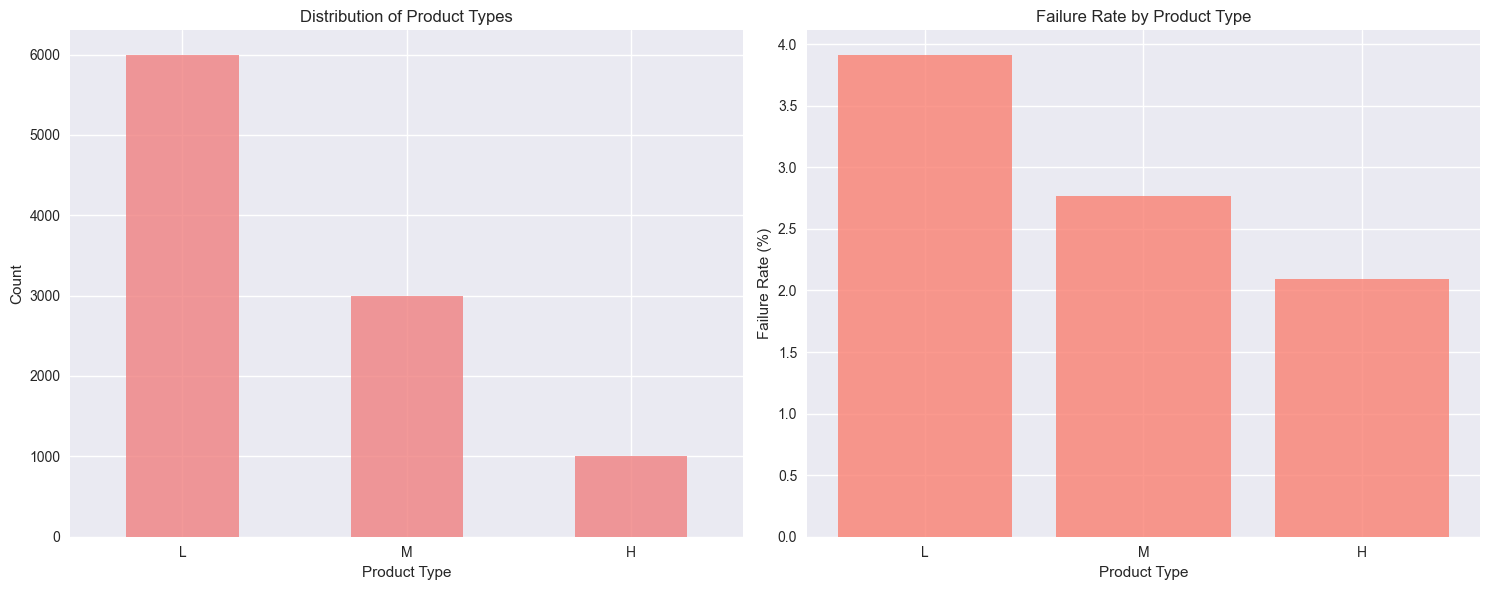

In [39]:
# Analyze categorical features: Product ID and Type
print("📊 Categorical Feature Analysis:")
print("=" * 40)

# Product ID analysis
print("\n🔹 Product ID:")
print(f"Unique products: {df['Product ID'].nunique()}")
print(f"Sample values: {df['Product ID'].head(10).tolist()}")

# Type analysis - Detailed breakdown
print("\n🔹 Type (Product Quality) - Detailed Analysis:")
type_counts = df['Type'].value_counts()
print(f"Product types: {list(type_counts.index)}")

print("\n📊 Absolute Numbers by Product Type:")
for product_type in ['L', 'M', 'H']:  # Low, Medium, High quality
    if product_type in type_counts.index:
        count = type_counts[product_type]
        percentage = (count / len(df)) * 100
        print(f"  • {product_type}: {count:,} products ({percentage:.1f}%)")

# Detailed failure analysis by type
print("\n🎯 Failure Analysis by Product Type:")
type_failure_details = pd.crosstab(df['Type'], df['Machine failure'], margins=True)
print("Absolute counts (Non-Failure vs Failure):")
print(type_failure_details)

print("\n📈 Failure Rates by Product Type:")
for product_type in ['L', 'M', 'H']:
    if product_type in df['Type'].values:
        type_data = df[df['Type'] == product_type]
        total_count = len(type_data)
        failure_count = type_data['Machine failure'].sum()
        non_failure_count = total_count - failure_count
        failure_rate = (failure_count / total_count) * 100
        
        print(f"\n  🔸 Type {product_type}:")
        print(f"    • Total products: {total_count:,}")
        print(f"    • Non-failures: {non_failure_count:,}")
        print(f"    • Failures: {failure_count:,}")
        print(f"    • Failure rate: {failure_rate:.2f}%")

# Summary comparison: Frequency vs Failure Rate
print("\n🏆 SUMMARY: Product Type Frequency vs Failure Rate")
print("=" * 55)
print(f"{'Type':<6} {'Count':<8} {'% of Total':<12} {'Failures':<10} {'Failure Rate':<12}")
print("-" * 55)

for product_type in ['L', 'M', 'H']:
    if product_type in df['Type'].values:
        type_data = df[df['Type'] == product_type]
        total_count = len(type_data)
        percentage_of_total = (total_count / len(df)) * 100
        failure_count = type_data['Machine failure'].sum()
        failure_rate = (failure_count / total_count) * 100
        
        print(f"{product_type:<6} {total_count:<8,} {percentage_of_total:<11.1f}% {failure_count:<10,} {failure_rate:<11.2f}%")

# Visualize Type distribution and failure rates
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribution plot
type_counts.plot(kind='bar', ax=ax1, color='lightcoral', alpha=0.8)
ax1.set_title('Distribution of Product Types')
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Failure rate plot
failure_rates = []
for product_type in type_counts.index:
    type_data = df[df['Type'] == product_type]
    failure_rate = (type_data['Machine failure'].sum() / len(type_data)) * 100
    failure_rates.append(failure_rate)

ax2.bar(type_counts.index, failure_rates, color='salmon', alpha=0.8)
ax2.set_title('Failure Rate by Product Type')
ax2.set_xlabel('Product Type')
ax2.set_ylabel('Failure Rate (%)')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 10. Data Quality Assessment

In [40]:
# Comprehensive data quality report
print("📋 Data Quality Assessment Report:")
print("=" * 50)

# 1. Missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percentage
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

if len(missing_summary) > 0:
    print("\n❌ Missing Values:")
    print(missing_summary)
else:
    print("\n✅ No missing values found!")

# 2. Duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df)) * 100
print(f"\n🔍 Duplicate Rows: {duplicate_count} ({duplicate_percentage:.2f}%)")

# 3. Data types consistency
print("\n📊 Data Types:")
type_summary = df.dtypes.value_counts()
print(type_summary)

# 4. Memory usage
memory_usage = df.memory_usage(deep=True).sum() / 1024**2  # MB
print(f"\n💾 Memory Usage: {memory_usage:.2f} MB")

# 5. Dataset completeness score
completeness_score = ((len(df) * len(df.columns)) - df.isnull().sum().sum()) / (len(df) * len(df.columns)) * 100
print(f"\n🎯 Dataset Completeness Score: {completeness_score:.2f}%")

📋 Data Quality Assessment Report:

✅ No missing values found!

🔍 Duplicate Rows: 0 (0.00%)

📊 Data Types:
int64      10
object      3
float64     3
Name: count, dtype: int64

💾 Memory Usage: 2.78 MB

🎯 Dataset Completeness Score: 100.00%


## 11. Initial Insights and Recommendations

In [41]:
print("💡 INITIAL INSIGHTS AND RECOMMENDATIONS")
print("=" * 50)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Total samples: {len(df):,}")
print(f"  • Total features: {len(df.columns)}")
print(f"  • Numerical features: {len(numerical_cols)}")
print(f"  • Categorical features: {len(categorical_cols)}")

if target_col:
    target_balance = df[target_col].value_counts(normalize=True)
    print(f"\n🎯 TARGET VARIABLE ({target_col}):")
    for value, percentage in target_balance.items():
        print(f"  • {value}: {percentage:.1%}")

print("\n🔧 NEXT STEPS - FEATURE ENGINEERING:")
print("  1. Handle outliers in numerical features")
print("  2. Consider feature scaling/normalization")
print("  3. Encode categorical variables")
if len([col for col in numerical_cols if 'temp' in col.lower() or 'temperature' in col.lower()]) > 0:
    print("  4. Engineer temperature-based features")
print("  5. Create interaction features between correlated variables")
print("  6. Consider polynomial features for non-linear relationships")

print("\n🤖 MODELING RECOMMENDATIONS:")
if target_col and df[target_col].value_counts().min() / df[target_col].value_counts().max() < 0.3:
    print("  • Address class imbalance with SMOTE, undersampling, or class weights")
print("  • Start with ensemble methods (Random Forest, XGBoost)")
print("  • Consider SVM for high-dimensional data")
print("  • Implement cross-validation for robust evaluation")
print("  • Use appropriate metrics for imbalanced data (F1, ROC-AUC, PR-AUC)")

print("\n📈 DATA QUALITY:")
if duplicate_count > 0:
    print(f"  ⚠️  Remove {duplicate_count} duplicate rows")
if any(missing_data > 0):
    print("  ⚠️  Handle missing values before modeling")
else:
    print("  ✅ Excellent data quality - no missing values or duplicates")

print("\n🎯 SUCCESS METRICS:")
print("  • Primary: F1-Score, Precision, Recall")
print("  • Secondary: ROC-AUC, PR-AUC")
print("  • Business: False Positive/Negative rates")

💡 INITIAL INSIGHTS AND RECOMMENDATIONS

📊 DATASET OVERVIEW:
  • Total samples: 10,000
  • Total features: 16
  • Numerical features: 12
  • Categorical features: 2

🎯 TARGET VARIABLE (Machine failure):
  • 0: 96.6%
  • 1: 3.4%

🔧 NEXT STEPS - FEATURE ENGINEERING:
  1. Handle outliers in numerical features
  2. Consider feature scaling/normalization
  3. Encode categorical variables
  4. Engineer temperature-based features
  5. Create interaction features between correlated variables
  6. Consider polynomial features for non-linear relationships

🤖 MODELING RECOMMENDATIONS:
  • Address class imbalance with SMOTE, undersampling, or class weights
  • Start with ensemble methods (Random Forest, XGBoost)
  • Consider SVM for high-dimensional data
  • Implement cross-validation for robust evaluation
  • Use appropriate metrics for imbalanced data (F1, ROC-AUC, PR-AUC)

📈 DATA QUALITY:
  ✅ Excellent data quality - no missing values or duplicates

🎯 SUCCESS METRICS:
  • Primary: F1-Score, Prec

## 12. Save Exploration Results

In [42]:
# Save key findings for future reference
exploration_summary = {
    'dataset_shape': df.shape,
    'target_variable': target_col,
    'numerical_features': numerical_cols,
    'categorical_features': categorical_cols,
    'missing_values': df.isnull().sum().to_dict(),
    'duplicate_rows': duplicate_count,
    'data_types': df.dtypes.to_dict()
}

print("💾 Exploration summary prepared for next phase!")

💾 Exploration summary prepared for next phase!
